# Week2授業前課題1
## 小麦とチェス盤問題
曽呂利新左衛門の米の逸話に似たものとして、小麦とチェス盤の話があります。これを題材に多次元配列を扱うための数値計算ライブラリ NumPy の使い方に慣れていきます。

>If a chessboard were to have wheat placed upon each square such that one grain were placed on the first square, two on the second, four on the third, and so on (doubling the number of grains on each subsequent square), how many grains of wheat would be on the chessboard at the finish?


8×8マスのチェス盤の上に、小麦の粒を1, 2, 4と順番に置いていくと最終的な小麦の数はどのようになるかという問題です。

# 問題1
## 2x2マスのチェス盤の小麦の数
2×2マスのチェス盤をndarrayによって表現し、各マスの小麦の数を計算してください。左上のマスに小麦を1つ置いた後、その右が2つ、左下が4つ、右下が8つという風に進みます。


サンプルコードで作成したndarrayのshapeの変形を行ってください。

In [98]:
import numpy as np

row_number = 2
column_number = 2
small_board_list = [1]
for _ in range((row_number * column_number) - 1):
    small_board_list.append(2*small_board_list[-1])
small_board_ndarray = np.array(small_board_list).reshape(row_number, column_number)
print("{}×{}マスの板に小麦を並べる（ndarray）：\n{}"
    .format(row_number, column_number, small_board_ndarray))

2×2マスの板に小麦を並べる（ndarray）：
[[1 2]
 [4 8]]


# 問題2
## n×mマスへの拡張
n×mマスのチェス盤の小麦の数を記したndarrayを返す関数を作成してください。そして、この関数を使い8×8マスのチェス盤の小麦の数を求めてください。

In [99]:
"""
params:
    row_number: 行数
    column_number: 列数
return:
    *: shape(row_number, column_number)のndarray
"""
def get_wheat_array(row_number, column_number):
    board_list = [1]
    for _ in range((row_number * column_number) - 1):
        board_list.append(2*board_list[-1])
    return np.array(board_list).reshape(row_number, column_number)

# 8x8のチェス盤の小麦の数を求める
print("8×8マスの板に小麦を並べる（ndarray）：\n{}"
    .format(get_wheat_array(8, 8)))

# 桁が大きいので省略され指数表記になっている

8×8マスの板に小麦を並べる（ndarray）：
[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.6116

# 問題3
## 小麦の数の合計
8×8マスのチェス盤の小麦の数の合計を求めてください。また、各列の平均を求め、それを棒グラフで可視化してください。

棒グラフはサンプルコードを用意しています。

In [100]:
"""
params:
    row_number: 行数
    column_number: 列数
return:
    *: shape(row_number, column_number)のndarrayの合計値
"""
def total_wheat_count(row_number, column_number):
    board_ndarray = get_wheat_array(row_number, column_number)
    return np.sum(board_ndarray)

# 8x8のチェス盤の小麦の数の合計を求める
print("8×8マスの板に小麦を並べる（ndarray） - 合計値：{}"
    .format(total_wheat_count(8, 8)))

8×8マスの板に小麦を並べる（ndarray） - 合計値：1.8446744073709552e+19


# 問題4
## 小麦の数のヒートマップ
8×8マスのチェス盤の小麦の数をヒートマップとして可視化してください。


ヒートマップはサンプルコードを用意しています。

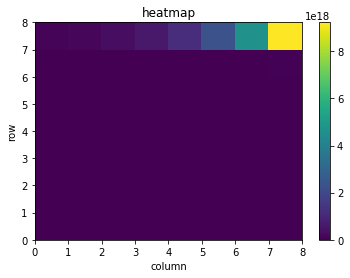

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("heatmap")
plt.xlabel("column")
plt.ylabel("row")
plt.pcolor(get_wheat_array(8, 8))
plt.colorbar() # わかりにくかったので追加
plt.show()

# 問題5
## 後半は前半の何倍か
チェス盤の後半にある小麦の数は前半にある小麦の数の何倍かを求めてください。前半とは配列の0から3行目、後半は4から7行目です。

In [102]:
# 8x8の小麦が乗ったチェス盤を得る
board_array = get_wheat_array(8, 8)
# スライスで分割（前半/後半）
first_half_array = board_array[:4]
second_half_array = board_array[4:]

print("後半（4-7行目）は前半（0-3行目）の{}倍"
    .format(np.sum(second_half_array) / np.sum(first_half_array)))

# 全要素が2^32倍になるので合計も同様

後半（4-7行目）は前半（0-3行目）の4294967296.0倍


# 問題6
## 他の計算方法によるn×mマスへの拡張
問題2と同様の「n×mマスのチェス盤の小麦の数を記したndarrayを返す関数」を、np.append()を使ったものと、ブロードキャストを使ったもので新たに作成してください。


それらの関数を使い8×8マスのチェス盤の小麦の数を再び求めてください。

In [103]:
"""
np.append()を利用する
params:
    row_number: 行数
    column_number: 列数
return:
    *: shape(row_number, column_number)のndarray
"""
def get_wheat_array_append(row_number, column_number):
    n_squares = row_number * column_number
    board_ndarray = np.array([1]).astype(np.uint64)
    for _ in range(n_squares - 1):
        board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])
    return board_ndarray.reshape(row_number, column_number)

print("8×8マスの板に小麦を並べる（ndarray） - np.append()：\n{}"
    .format(get_wheat_array_append(8, 8)))

8×8マスの板に小麦を並べる（ndarray） - np.append()：
[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584

In [104]:
"""
ブロードキャストを利用する
params:
    row_number: 行数
    column_number: 列数
return:
    *: shape(row_number, column_number)のndarray
"""
def get_wheat_array_broadcast(row_number, column_number):
    n_squares = row_number * column_number
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    board_ndarray = 2**indices_of_squares
    return board_ndarray.reshape(row_number, column_number)

print("8×8マスの板に小麦を並べる（ndarray） - broadcast：\n{}"
    .format(get_wheat_array_broadcast(8, 8)))

8×8マスの板に小麦を並べる（ndarray） - broadcast：
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
    

# 問題7
## 計算時間の比較
3種類の方法を見てきました。それぞれの計算時間をJupyter Notebookの`%%timeit`を用いて計測し、比較と考察を行ってください。


`%%timeit`はセル内のコードを複数回実行し、その平均実行時間を出力する働きをします。

In [105]:
%%timeit
# list & for loop
get_wheat_array(8, 8)

26.9 µs ± 3.33 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [106]:
%%timeit
# np.append()
get_wheat_array_append(8, 8)

669 µs ± 29.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [107]:
%%timeit
# broadcast
get_wheat_array_broadcast(8, 8)

5.25 µs ± 122 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### 速度比較
broadcast > for loop > np.append()